In [1]:
import pandas as pd
from suncalc import get_position, get_times
from datetime import datetime, timezone

In [60]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

#temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
#temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

In [2]:
temp = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/marvin_2024.csv')
temp['datetime']=pd.to_datetime(temp['datetime'])
temp['datetime_UTC'] = temp['datetime']
temp['value'] = temp['ta']

In [3]:
lon = 7.85222
lat = 47.9959

In [4]:
times = {}
for i in temp['datetime_UTC'].unique():

    times[i] = get_times(i, lon, lat)

In [5]:
times[temp['datetime_UTC'].loc[0]]['sunrise']

Timestamp('2022-09-01 04:47:39.625151855')

In [6]:
times

{Timestamp('2022-09-01 00:00:00+0000', tz='UTC'): {'solar_noon': Timestamp('2022-09-01 11:30:12.397022461'),
  'nadir': Timestamp('2022-08-31 23:30:12.397022461'),
  'sunrise': Timestamp('2022-09-01 04:47:39.625151855'),
  'sunset': Timestamp('2022-09-01 18:12:45.168893311'),
  'sunrise_end': Timestamp('2022-09-01 04:50:55.933159668'),
  'sunset_start': Timestamp('2022-09-01 18:09:28.860885498'),
  'dawn': Timestamp('2022-09-01 04:15:26.174443848'),
  'dusk': Timestamp('2022-09-01 18:44:58.619601074'),
  'nautical_dawn': Timestamp('2022-09-01 03:36:20.670127197'),
  'nautical_dusk': Timestamp('2022-09-01 19:24:04.123917725'),
  'night_end': Timestamp('2022-09-01 02:54:12.244774902'),
  'night': Timestamp('2022-09-01 20:06:12.549270020'),
  'golden_hour_end': Timestamp('2022-09-01 05:29:07.045536377'),
  'golden_hour': Timestamp('2022-09-01 17:31:17.748508789')},
 Timestamp('2022-09-01 01:00:00+0000', tz='UTC'): {'solar_noon': Timestamp('2022-09-01 11:30:12.397022461'),
  'nadir': Times

In [7]:
temp['sunrise'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['sunrise'].replace(tzinfo=timezone.utc))
temp['sunset'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['sunset'].replace(tzinfo=timezone.utc))

In [8]:
temp['solar_noon'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['solar_noon'].replace(tzinfo=timezone.utc))
temp['nadir'] = temp['datetime_UTC'].apply(
    lambda x: times[x]['nadir'].replace(tzinfo=timezone.utc))

In [9]:
temp

,datetime,station_id,ta,vp,datetime_UTC,value,sunrise,sunset,solar_noon,nadir
0,2022-09-01 00:00:00+00:00,FRASHA,14.629891,1.441245,2022-09-01 00:00:00+00:00,14.629891,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00
1,2022-09-01 00:00:00+00:00,FRBETZ,16.713000,1.459968,2022-09-01 00:00:00+00:00,16.713000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00
2,2022-09-01 00:00:00+00:00,FRBRUH,16.285000,1.484469,2022-09-01 00:00:00+00:00,16.285000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00
3,2022-09-01 00:00:00+00:00,FRDIET,13.840833,1.580545,2022-09-01 00:00:00+00:00,13.840833,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00
4,2022-09-01 00:00:00+00:00,FRDREI,16.611667,1.495245,2022-09-01 00:00:00+00:00,16.611667,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00
...,...,...,...,...,...,...,...,...,...,...
736885,2024-09-01 00:00:00+00:00,FRWEIN,21.804667,1.974577,2024-09-01 00:00:00+00:00,21.804667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00
736886,2024-09-01 00:00:00+00:00,FRWILD,19.727333,2.296735,2024-09-01 00:00:00+00:00,19.727333,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00
736887,2024-09-01 00:00:00+00:00,FRWITT,22.871000,1.939729,2024-09-01 00:00:00+00:00,22.871000,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00
736888,2024-09-01 00:00:00+00:00,FRWSEE,20.290667,2.013700,2024-09-01 00:00:00+00:00,20.290667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00


In [10]:
temp['date'] = temp['datetime_UTC'].dt.date

In [11]:
for i in temp['date'].unique():
    max_index = temp[temp['date'] == i].value.idxmax()
    min_index = temp[temp['date'] == i].value.idxmin()

    if temp.loc[max_index]['datetime_UTC'] > temp.loc[max_index]['sunrise'] and temp.loc[max_index]['datetime_UTC'] < temp.loc[max_index]['sunset']:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'no'
    elif temp.loc[min_index]['datetime_UTC'] > temp.loc[min_index]['sunrise'] and temp.loc[min_index]['datetime_UTC'] < temp.loc[min_index]['sunset']:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'yes'
    else:
        temp.loc[temp['date'] == i,'synoptically controlled'] = 'yes'

In [12]:
subset = temp[temp['station_id'] == 'FRKART'].copy()

for i in subset['date'].unique():
    max_index = subset[subset['date'] == i].value.idxmax()
    min_index = subset[subset['date'] == i].value.idxmin()

    if subset.loc[max_index]['datetime_UTC'] > subset.loc[max_index]['sunrise'] and subset.loc[max_index]['datetime_UTC'] < subset.loc[max_index]['sunset']:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'no'
    elif subset.loc[min_index]['datetime_UTC'] > subset.loc[min_index]['sunrise'] and subset.loc[min_index]['datetime_UTC'] < subset.loc[min_index]['sunset']:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'yes'
    else:
        subset.loc[subset['date'] == i,'synoptically controlled'] = 'yes'

In [13]:
# for temp dataframe, calculate fraction of sunrise to sunset
# i.e. if sunset is 0 and sunrise is 1, what is fraction
def fraction_of_day(date, lon, lat):
    times = get_times(date, lon, lat)
    sunrise = times['sunrise'].replace(tzinfo=timezone.utc)
    sunset = times['sunset'].replace(tzinfo=timezone.utc)
    
    if sunrise is None or sunset is None:
        return None
    
    total_daylight = (sunset - sunrise).total_seconds()
    current_time = date.replace(tzinfo=timezone.utc)
    
    if current_time < sunrise or current_time > sunset:
        return 0.0
    
    elapsed_time = (current_time - sunrise).total_seconds()
    return elapsed_time / total_daylight

def fraction_of_night(date, lon, lat):
    #previous day
    yesterday = date - pd.Timedelta(days=1)
    yesterday_times = get_times(yesterday, lon, lat)
    yesterday_sunset = yesterday_times['sunset'].replace(tzinfo=timezone.utc)

    times = get_times(date, lon, lat)
    sunrise = times['sunrise'].replace(tzinfo=timezone.utc)
    sunset = times['sunset'].replace(tzinfo=timezone.utc)
    
    if sunrise is None or sunset is None:
        return None
    
    current_time = date.replace(tzinfo=timezone.utc)
    total_nighttime = (sunrise - yesterday_sunset).total_seconds()

    if date > sunset:
        # If the date is after sunset, we consider today's sunset
        elapsed_time = (current_time - sunset).total_seconds()
    else:
        elapsed_time = (current_time - yesterday_sunset).total_seconds()

    return elapsed_time / total_nighttime

In [14]:
# drop duplicate rows
dates = temp[['datetime_UTC','sunrise','sunset']].drop_duplicates()

In [15]:
for index in dates.index:
    date = dates.loc[index, 'datetime_UTC']
    lon = 7.85222
    lat = 47.9959
    
    dates.loc[index, 'fraction_of_day'] = fraction_of_day(date, lon, lat)
    dates.loc[index, 'fraction_of_night'] = fraction_of_night(date, lon, lat)

In [16]:
dates.iloc[19]

datetime_UTC                   2022-09-01 19:00:00+00:00
sunrise              2022-09-01 04:47:39.625151855+00:00
sunset               2022-09-01 18:12:45.168893311+00:00
fraction_of_day                                      0.0
fraction_of_night                                0.07465
Name: 798, dtype: object

In [17]:
temp.merge(dates[['datetime_UTC', 'fraction_of_day', 'fraction_of_night']], on='datetime_UTC', how='left').to_csv('/Users/lisawink/Documents/paper1/data/processed_data/temp_synoptic_controls_2024.csv', index=False)

In [18]:
temp.merge(dates[['datetime_UTC', 'fraction_of_day', 'fraction_of_night']], on='datetime_UTC', how='left')

,datetime,station_id,ta,vp,datetime_UTC,value,sunrise,sunset,solar_noon,nadir,date,synoptically controlled,fraction_of_day,fraction_of_night
0,2022-09-01 00:00:00+00:00,FRASHA,14.629891,1.441245,2022-09-01 00:00:00+00:00,14.629891,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
1,2022-09-01 00:00:00+00:00,FRBETZ,16.713000,1.459968,2022-09-01 00:00:00+00:00,16.713000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
2,2022-09-01 00:00:00+00:00,FRBRUH,16.285000,1.484469,2022-09-01 00:00:00+00:00,16.285000,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
3,2022-09-01 00:00:00+00:00,FRDIET,13.840833,1.580545,2022-09-01 00:00:00+00:00,13.840833,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
4,2022-09-01 00:00:00+00:00,FRDREI,16.611667,1.495245,2022-09-01 00:00:00+00:00,16.611667,2022-09-01 04:47:39.625151855+00:00,2022-09-01 18:12:45.168893311+00:00,2022-09-01 11:30:12.397022461+00:00,2022-08-31 23:30:12.397022461+00:00,2022-09-01,no,0.0,0.545502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736885,2024-09-01 00:00:00+00:00,FRWEIN,21.804667,1.974577,2024-09-01 00:00:00+00:00,21.804667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736886,2024-09-01 00:00:00+00:00,FRWILD,19.727333,2.296735,2024-09-01 00:00:00+00:00,19.727333,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736887,2024-09-01 00:00:00+00:00,FRWITT,22.871000,1.939729,2024-09-01 00:00:00+00:00,22.871000,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624
736888,2024-09-01 00:00:00+00:00,FRWSEE,20.290667,2.013700,2024-09-01 00:00:00+00:00,20.290667,2024-09-01 04:48:18.831617920+00:00,2024-09-01 18:11:47.568079346+00:00,2024-09-01 11:30:03.199848633+00:00,2024-08-31 23:30:03.199848633+00:00,2024-09-01,yes,0.0,0.545624


In [99]:
temp.to_csv('/Users/lisawink/Documents/paper1/data/processed_data/temp_synoptic_controls.csv', index=False)

<Axes: xlabel='datetime_UTC'>

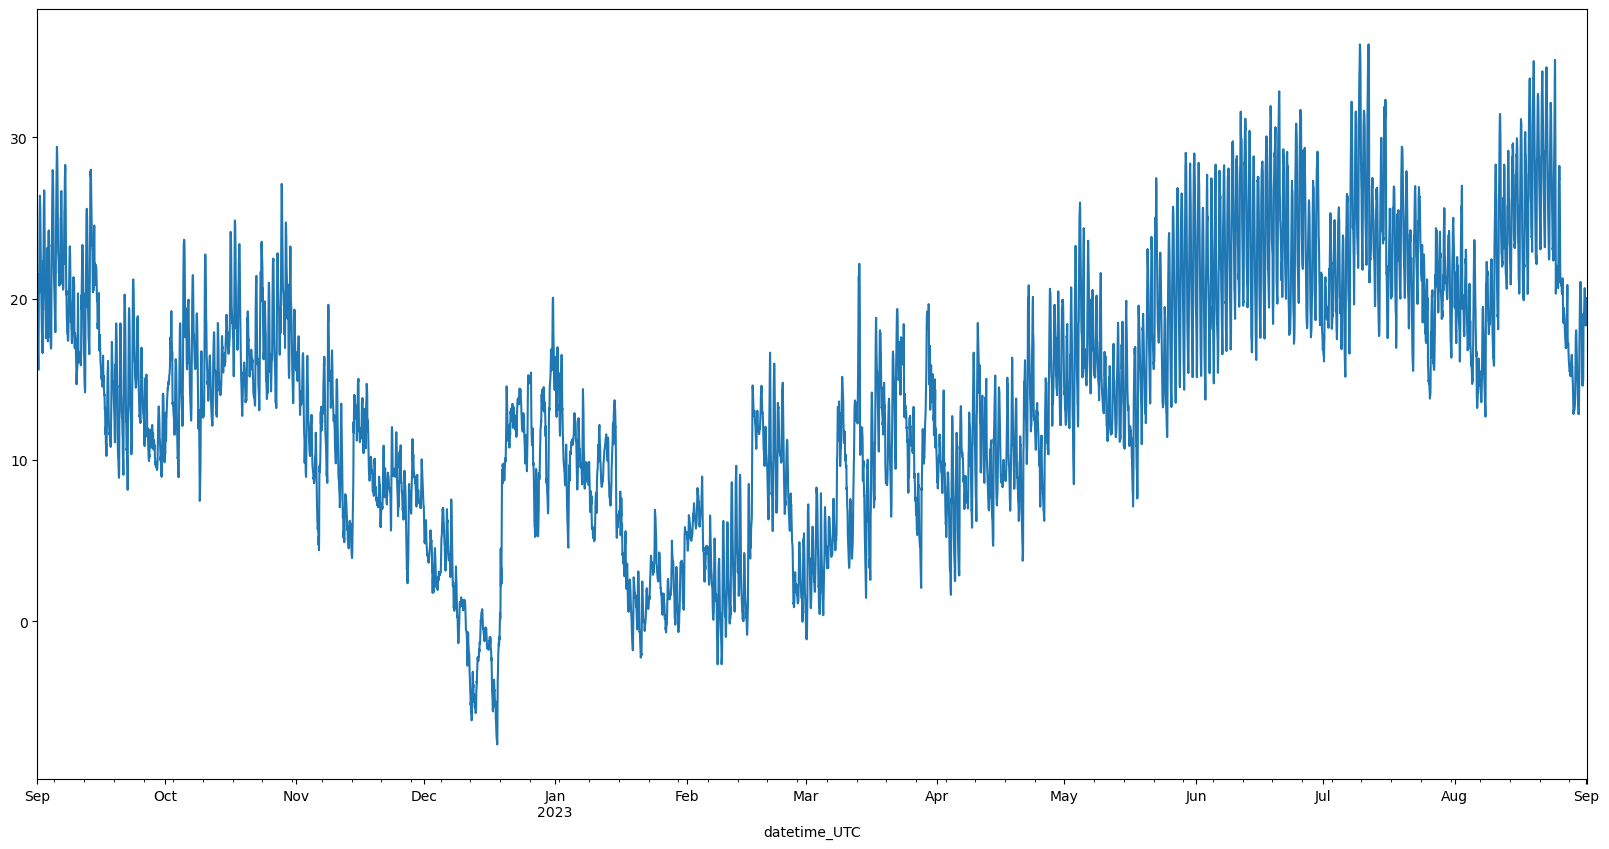

In [17]:
temp.loc['FRKART'].plot(figsize=(20, 10))

In [18]:
temp

datetime_UTC,2022-09-01 00:00:00+00:00,2022-09-01 01:00:00+00:00,2022-09-01 02:00:00+00:00,2022-09-01 03:00:00+00:00,2022-09-01 04:00:00+00:00,2022-09-01 05:00:00+00:00,2022-09-01 06:00:00+00:00,2022-09-01 07:00:00+00:00,2022-09-01 08:00:00+00:00,2022-09-01 09:00:00+00:00,...,2023-08-31 21:00:00+00:00,2023-08-31 22:00:00+00:00,2023-08-31 23:00:00+00:00,2023-09-01 00:00:00+00:00,2023-09-01 01:00:00+00:00,2023-09-01 02:00:00+00:00,2023-09-01 03:00:00+00:00,2023-09-01 04:00:00+00:00,2023-09-01 05:00:00+00:00,2023-09-01 06:00:00+00:00
station_id,,,,,,,,,,,,,,,,,,,,,
FRASHA,14.78,14.53,14.20,13.73,13.38,12.81,13.81,16.09,17.72,18.89,...,16.54,16.34,18.37,19.90,19.39,18.78,18.85,18.66,18.90,19.18
FRBETZ,16.85,15.73,15.15,14.79,14.34,13.98,14.57,16.08,17.71,18.92,...,18.88,19.17,19.88,19.64,19.18,18.59,18.65,18.09,18.60,19.17
FRBRUH,16.33,15.90,15.40,14.76,14.41,13.87,14.15,15.00,17.27,19.62,...,19.69,19.91,20.42,20.40,19.85,19.22,19.15,18.63,18.91,19.52
FRDIET,13.98,14.53,13.46,13.22,13.08,14.01,15.14,18.82,19.14,19.53,...,18.43,18.85,19.45,19.48,19.00,18.33,18.26,17.62,18.46,18.95
FRDREI,16.61,16.21,16.06,15.54,14.62,14.17,14.99,16.41,17.61,18.23,...,19.33,19.43,19.91,19.92,19.29,18.76,18.68,17.99,18.30,18.78
FREBNE,13.42,13.58,13.09,13.12,12.85,12.23,13.98,16.56,18.37,19.87,...,15.05,15.08,17.47,19.52,19.08,18.38,18.47,17.81,16.14,16.68
FREICH,13.79,13.68,13.73,13.35,12.96,12.83,13.36,15.50,17.73,18.96,...,15.88,16.57,17.11,16.63,16.39,15.76,15.29,15.40,15.59,16.20
FRFRIE,15.22,14.71,14.32,13.86,13.40,13.21,14.30,17.21,21.34,21.91,...,19.14,19.41,19.92,19.93,19.29,18.76,18.70,17.78,18.10,19.03
FRGART,15.91,15.90,15.27,15.14,14.41,13.37,17.11,18.70,19.09,20.33,...,19.25,19.43,19.94,19.91,19.29,18.73,18.61,18.23,18.71,19.23


<Axes: xlabel='datetime_UTC'>

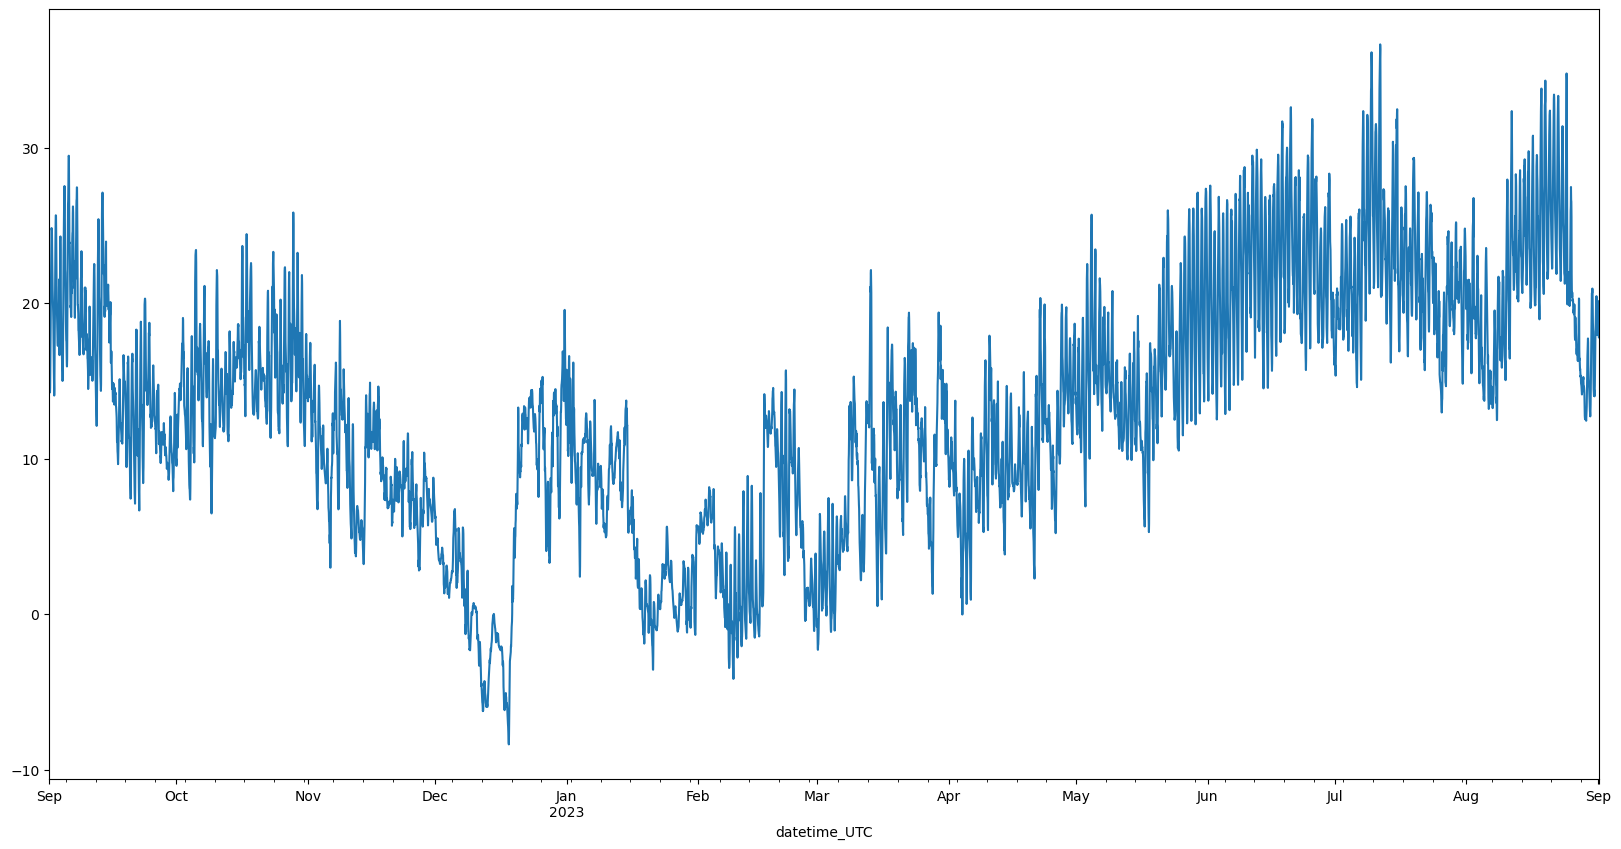

In [19]:
temp.loc['FRHERD'].plot(figsize=(20, 10))

In [ ]:
# for every day, find max and min air temp

temp_daily = temp.resample('D').agg(['max', 'min'])